- Pensamiento algoritmico
- Algoritmo de gauss y la suma, algoritmo Gredy. 
- Como funciona un algoritmo de clasificación supervisado.
- Claisifcador frutas, Clasificador Texto

# Aprendizaje de maquina: Clasificador k-nn







## Importando las librerias requeridas

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits = pd.read_table('fruit_data_with_colors.txt')

In [5]:
# Partir los datos en set de entrenamiento y de evaluación.
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
fruits.head() # mirar algunos datos de la tabla

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
# creando el diccionario de frutas
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


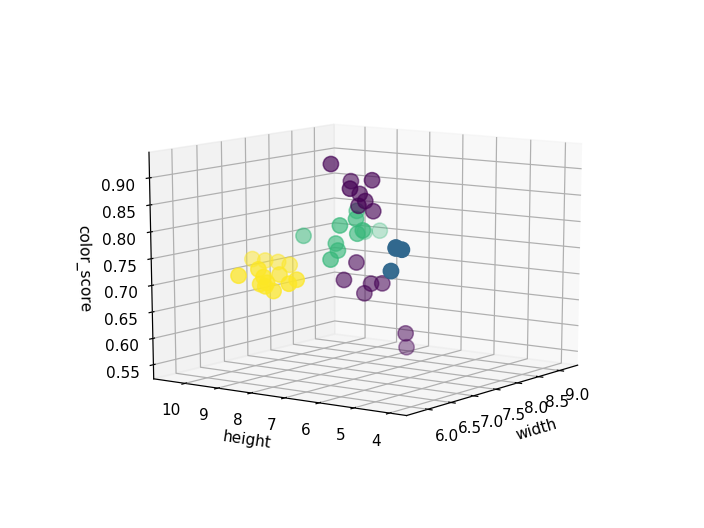

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

<IPython.core.display.Javascript object>


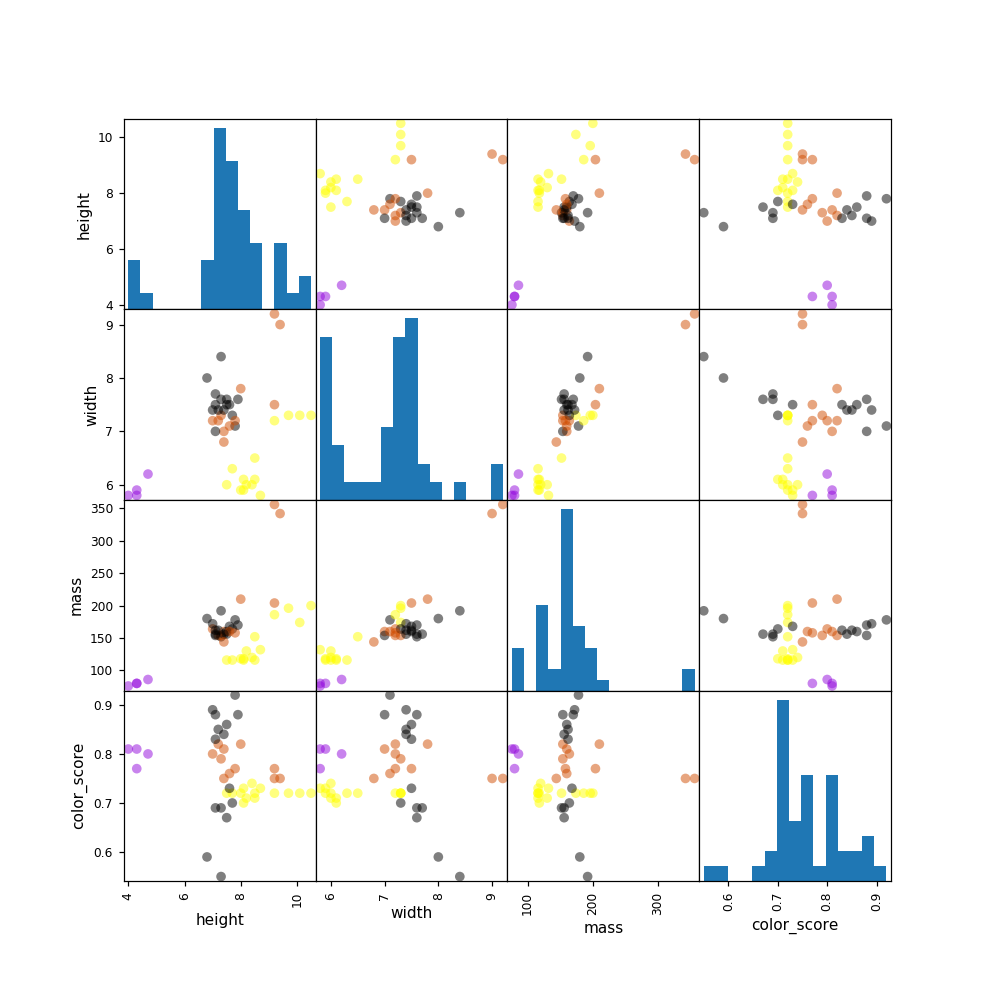

In [7]:
# plotting a scatter matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

## Crear aprtición de entrenamiento-evaluación

In [9]:
# Para este ejemplo vamos a usar la masa, la longitud, la altura
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
# 25% sera para evaluación y 75% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Crear clasificador

In [68]:
from sklearn.neighbors import KNeighborsClassifier # libreria

knn = KNeighborsClassifier(n_neighbors = 5, leaf_size=10) #2modelo de claisficación

## Entrenar y evaluar el clasificador

In [69]:
# entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
# evaluación, que tantas veces fue acertado
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))

0.533333333333
0.795454545455


## Usar nuestro clasificador para clasificar frutas

In [48]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [49]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

## Dibujar las fronteras de desición

<IPython.core.display.Javascript object>


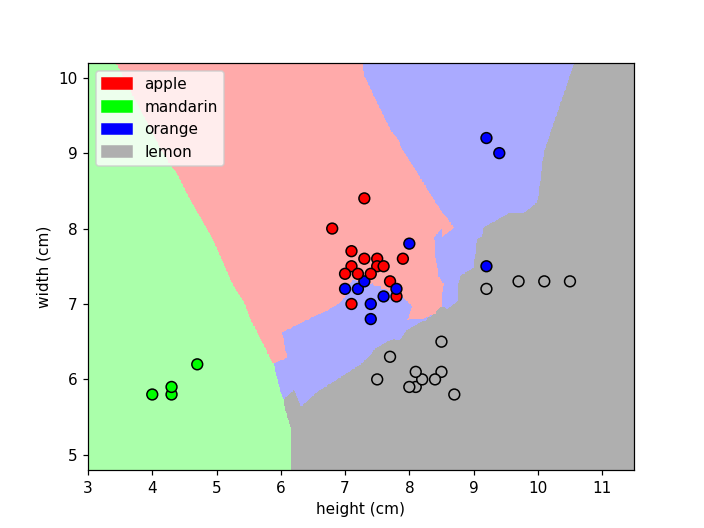

In [60]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors